In [4]:
from __future__ import division

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
from PIL import Image

In [8]:
from numpy.linalg import norm
from random import normalvariate
from math import sqrt

In [9]:
%matplotlib inline

In [10]:
img_file = "spideymeme.jpeg"

In [11]:
image = np.array(Image.open(img_file))

In [12]:
image = image / 255
row, col, _ = image.shape
print("pixels: " + str(row) + "*" + str(col))

pixels: 720*1280


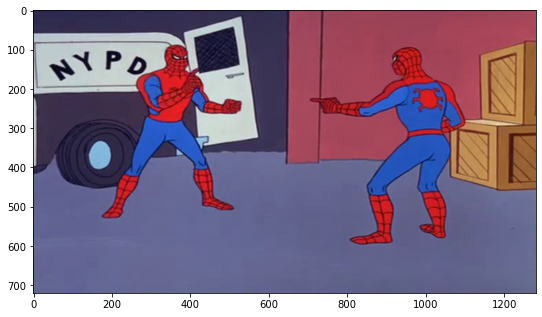

In [13]:
fig = plt.figure(figsize=(9,6))
#a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(image)
#a.set_title("Castle Hill, Budapest")
plt.show()

In [15]:
img_r = image[:,:,0]
img_g = image[:,:,1]
img_b = image[:,:,2]
row, col = img_r.shape
print("size: " + str(row) + "*" + str(col))

size: 720*1280


In [16]:
og_size = image.nbytes
print("Original size of image (bytes): " + str(og_size))

Original size of image (bytes): 22118400


In [18]:
def rando_unit_vector(n):
    unnormalized = [normalvariate(0,1) for _ in range(n)]
    theNorm = sqrt(sum(x * x for x in unnormalized))
    return [x / theNorm for x in unnormalized]

def svd_1d(A, epsilon=1e-10):
    n, m = A.shape
    x = rando_unit_vector(min(n,m))
    lastV = None
    currV = x
    
    if n > m:
        B = np.dot(A.T, A)
    else:
        B = np.dot(A, A.T)
        
    iters = 0;
    while True:
        iters += 1;
        lastV = currV
        currV = np.dot(B, lastV)
        currV = currV / norm(currV)
        
        if abs(np.dot(currV, lastV)) > 1 - epsilon:
            print("converged in {} iterations".format(iters))
            return currV

def custom_svd(A, k=None, epsilon=1e-10):
    A = np.array(A)
    n, m = A.shape
    currSVD = []
    
    if k is None:
        k = min(n,m)
        
    for i in range(k):
        matrix_for_1d = A.copy()
        
        for singular_value, u, v in currSVD[:i]:
            matrix_for_1d -= singular_value * np.outer(u,v)
        
        if n > m:
            v = svd_1d(matrix_for_1d, epsilon=epsilon)
            u_unnormalized = np.dot(A, v)
            sigma = norm(u_unnormalized)
            u = u_unnormalized / sigma
        else:
            u = svd_1d(matrix_for_1d, epsilon=epsilon)
            v_unnormalized = np.dot(A.T, u)
            sigma = norm(v_unnormalized)
            v = v_unnormalized / sigma
            
        currSVD.append((sigma,u,v))
        
    singular_values, us, vs = [np.array(x) for x in zip(*currSVD)]
    return us.T, singular_values, vs
# https://github.com/j2kun/svd/blob/main/svd.py

In [99]:
def class_svd(A, epsilon=1e-10):
    m, n = A.shape
    flag = False
    if m > n:
        flag = True
        A_square = np.dot(A.T, A)
    else:
        A_square = np.dot(A, A.T)
    #print(A_square)
    e_vals, e_vecs = np.linalg.eig(A_square)
    #print(e_vals)
    #print(e_vecs)
    U = []
    singulars = []
    V = []
    # find singulars
    for i in range(len(e_vals)):
        singulars.append(sqrt(e_vals[i]))
    # find V
    #if flag:
    #    A_square_V = np.dot(A.T, A)
    #else:
    #    A_square_V = np.dot(A.T, A)
    A_square_V = np.dot(A.T, A)
    e_vals_v, e_vecs_v = np.linalg.eig(A_square_V)
    e_vecs_v = e_vecs_v.T
    for i in range(len(e_vals_v)):
        if e_vals_v[i] < epsilon:
            e_vals_v[i] = 0
    print(e_vals_v)
    #print(e_vecs_v)
    for i in range(len(e_vals_v)):
        for j in range(len(e_vecs_v[i])):
            if abs(e_vecs_v[i][j]) < epsilon:
                e_vecs_v[i][j] = 0;
        V.append(e_vecs_v[i].T)
    #    V.append(e_vecs_v[:,i] / norm(e_vecs_v[:,i]))
    V = np.array(V)
    print(V)
    # find U
    for i in range(len(singulars)):
        U.append(np.dot(A, np.array(e_vecs_v[i]).T) / singulars[i])
    U = np.array(U)
    U = U.T
    print(U)
    
    return U, singulars, V

temp_arr = np.array([[3, 2, 2], [2, 3, -2]])
print(temp_arr)
temp_U, temp_singulars, temp_V = class_svd(temp_arr)
print(temp_singulars)

[[3 2 2]
 [2 3 2]]
[33.  1.  0.]
[[-0.61545745 -0.61545745 -0.49236596]
 [-0.70710678  0.70710678  0.        ]
 [-0.34815531 -0.34815531  0.87038828]]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[5.744562646538029, 1.0]


In [19]:
k = 50

In [97]:
U_r, d_r, V_r = custom_svd(img_r, k) #np.linalg.svd(img_r, full_matrices=True)
U_g, d_g, V_g = custom_svd(img_g, k) #np.linalg.svd(img_g, full_matrices=True)
U_b, d_b, V_b = custom_svd(img_b, k) #np.linalg.svd(img_b, full_matrices=True)
print(d_r)

converged in 4 iterations
converged in 13 iterations
converged in 26 iterations
converged in 33 iterations
converged in 68 iterations
converged in 47 iterations
converged in 31 iterations
converged in 39 iterations
converged in 39 iterations
converged in 41 iterations
converged in 44 iterations
converged in 248 iterations
converged in 57 iterations
converged in 48 iterations
converged in 55 iterations
converged in 293 iterations
converged in 49 iterations
converged in 133 iterations
converged in 72 iterations
converged in 277 iterations
converged in 238 iterations
converged in 150 iterations
converged in 94 iterations
converged in 139 iterations
converged in 97 iterations
converged in 304 iterations
converged in 67 iterations
converged in 83 iterations
converged in 227 iterations
converged in 268 iterations
converged in 88 iterations
converged in 279 iterations
converged in 98 iterations
converged in 661 iterations
converged in 92 iterations
converged in 218 iterations
converged in 522

In [22]:
row1, col1 = U_r.shape
row2 = d_r.shape
row3, col3 = V_r.shape
print("size: {}, {}, {}, {}, {}".format(row1, col1, row2, row3, col3))
matrix_storage = sum([matrix.nbytes for matrix in [U_r, d_r, V_r, U_g, d_g, V_g, U_b, d_b, V_g]])
print("Size of matrices to store (bytes): " + str(matrix_storage))

size: 720, 50, (50,), 50, 1280
Size of matrices to store (bytes): 2401200


In [23]:
U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

In [24]:
compressed_size = sum([matrix.nbytes for matrix in[U_r_k, d_r_k, V_r_k, U_g_k, d_g_k, V_g_k, U_b_k, d_b_k, V_b_k]])
print("Compressed matrices size (bytes): " + str(compressed_size))

Compressed matrices size (bytes): 2401200


In [25]:
compression_ratio = compressed_size / og_size
print("Compression ratio: " + str(compression_ratio))

Compression ratio: 0.10856119791666667


In [26]:
img_r_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
img_g_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
img_b_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

In [27]:
reconstructed_img = np.zeros((row,col,3))
reconstructed_img[:,:,0] = img_r_approx
reconstructed_img[:,:,1] = img_g_approx
reconstructed_img[:,:,2] = img_b_approx

In [28]:
reconstructed_img[reconstructed_img < 0] = 0
reconstructed_img[reconstructed_img > 1] = 1

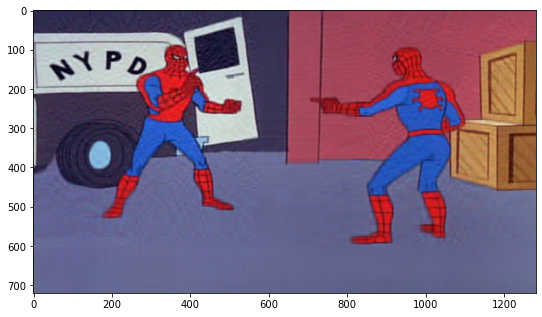

In [29]:
fig = plt.figure(figsize=(9,6))
imgplot = plt.imshow(reconstructed_img)
plt.show()